PyCon Talk Descriptions
=============


1. Read Urls
2. Tokenize
3. Split into Phrases
4. Count Phrases
5. Display Wordcloud
6. Mental Model

In [1]:

URLS = [
    "https://web.archive.org/web/20070607172601/http://wiki.python.org:80/moin/PyCon2006/Talks",
    "https://web.archive.org/web/20070316155413/http://us.pycon.org:80/apps07/talks/",
    "https://web.archive.org/web/20090802032818/http://us.pycon.org:80/2008/conference/talks/",
    "https://web.archive.org/web/20100712212408/http://us.pycon.org/2009/conference/talks/",
    "https://web.archive.org/web/20100316103314/http://us.pycon.org:80/2010/conference/talks/",
    "https://us.pycon.org/2011/schedule/lists/talks/",
]

TALK_YEARS = list(range(2006, 2018))


Read url and fetch text

In [2]:
import requests
from bs4 import BeautifulSoup


talk_descriptions = list()

for url in URLS:
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    if not soup.text:
        print("bad url parse:", url)
    talk_descriptions.append(soup.text)


In [5]:
soup.text

'\n\n\n\n\n\n\n\n\n\n\n      $(document).on(\'click\', \'.message button\', function(event) {\n        $(this).parent().hide();\n        return false;\n      });\n      $(document).on(\'click\', \'.dropdown-toggle\', function(event) {\n        /* toggle visibility of nav menu (jQuery sets the "display" attr) */\n        $(this).parent().children(\'.dropdown-menu\').toggle();\n        return false;\n      });\n      $(document).on(\'mouseout\', \'.dropdown\', function(event) {\n        /* remove any "display" attr that jQuery added when clicked */\n        $(this).children(\'.dropdown-menu\').removeAttr(\'style\');\n        return false;\n      });\n    \n\n\n\n\n\n    $(function () {\n      var converter = new Attacklab.showdown.converter();\n      $(\'.presentation-description\').each(function() {\n        $(this).html(converter.makeHtml($(this).text()));\n      });\n    });\n  \n\n\n\n\n\n\n\n\n\n\n\n\n                â\x96¼ About PyCon\n            \n\n\nWhat is PyCon?\n\n\nCode of 

Split the text into words (tokenize) and the words into phrases (ngrams).


In [6]:
from collections import Counter
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
import string

our_stopwords = set(stopwords.words('english'))
our_stopwords.update(string.punctuation)
our_stopwords.update([
    'python', 'talk', 'this', 'i', 'using', 'ballroom',
    'intermediate', 'beginner', 'advanced',
    'saturday', 'friday', 'sunday',
])

token = word_tokenize('\n'.join(talk_descriptions).lower())
unigrams = ngrams(token, 1)
bigrams = ngrams(token, 2)
trigrams = ngrams(token, 3)
fourgrams = ngrams(token, 4)

def word_criteria(word):
    if word.lower() in our_stopwords:
        return False
    return word.isalpha()

def filter_stopwords(ngrams_list):
    return filter(lambda ngrams: all(map(word_criteria, ngrams)), ngrams_list)

def join_ngram(ngrams_list):
    return map(lambda ngrams: ' '.join(ngrams), ngrams_list)

phrase_counter = Counter()
#phrase_counter.update(join_ngram(filter_stopwords(unigrams)))
phrase_counter.update(join_ngram(filter_stopwords(bigrams)))
phrase_counter.update(join_ngram(filter_stopwords(trigrams)))
phrase_counter.update(join_ngram(filter_stopwords(fourgrams)))

In [7]:
from pprint import pprint

pprint(phrase_counter.most_common(150))

[('open source', 97),
 ('best practices', 67),
 ('case study', 51),
 ('web framework', 35),
 ('web application', 35),
 ('web frameworks', 32),
 ('application development', 32),
 ('web applications', 31),
 ('great america', 26),
 ('mission city', 26),
 ('machine learning', 25),
 ('command line', 24),
 ('standard library', 23),
 ('lessons learned', 23),
 ('data structures', 21),
 ('software development', 21),
 ('centennial iii', 19),
 ('centennial iv', 19),
 ('centennial ii', 19),
 ('systems administration', 19),
 ('regency v', 18),
 ('unit testing', 18),
 ('programming language', 17),
 ('real world', 16),
 ('web services', 16),
 ('come learn', 16),
 ('data analysis', 16),
 ('merlinux gmbh', 14),
 ('design patterns', 14),
 ('web development', 14),
 ('regular expressions', 14),
 ('get started', 13),
 ('software foundation', 13),
 ('raymond hettinger', 12),
 ('natural language', 12),
 ('brett cannon', 12),
 ('open source software', 11),
 ('source software', 11),
 ('unit tests', 11),
 ('tit

Overall Popular Phrases
=============

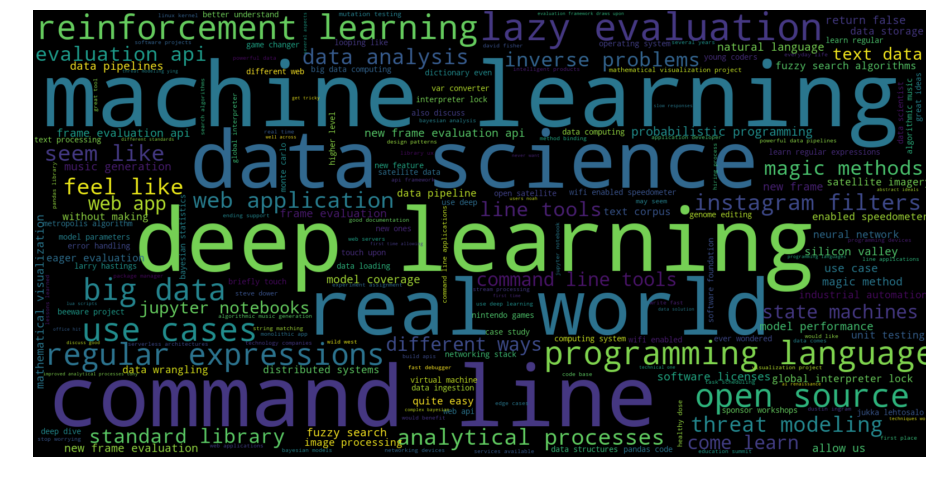

In [69]:
from wordcloud import WordCloud

wordcloud = WordCloud(relative_scaling=.2, width=800, height=400, scale=2.0)

wordcloud.generate_from_frequencies(phrase_counter)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 16)

#plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Year By Year
=======

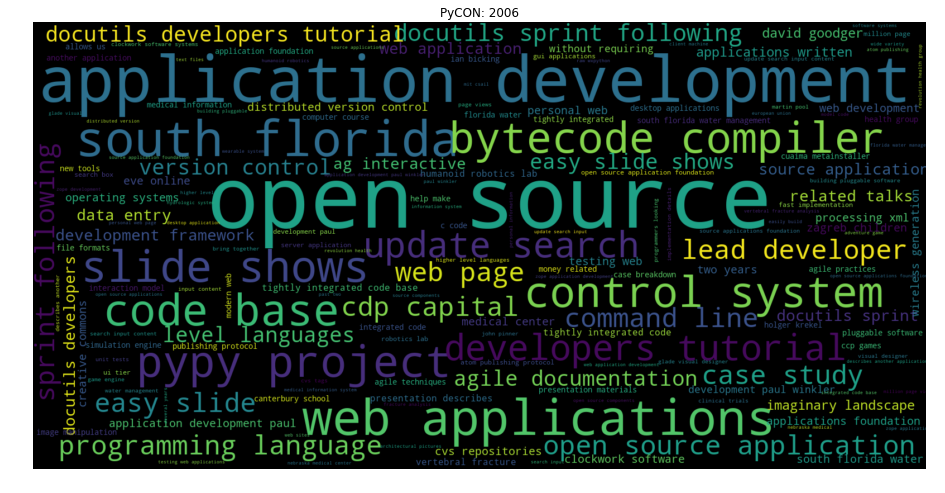

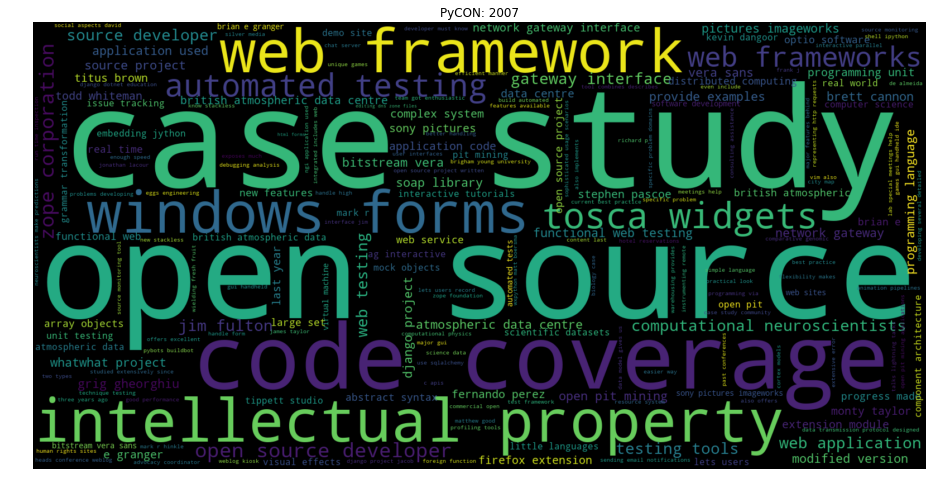

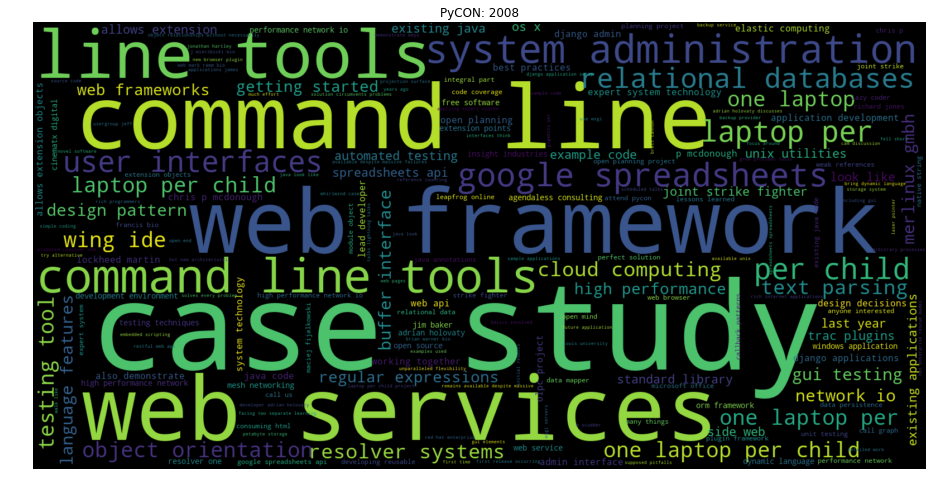

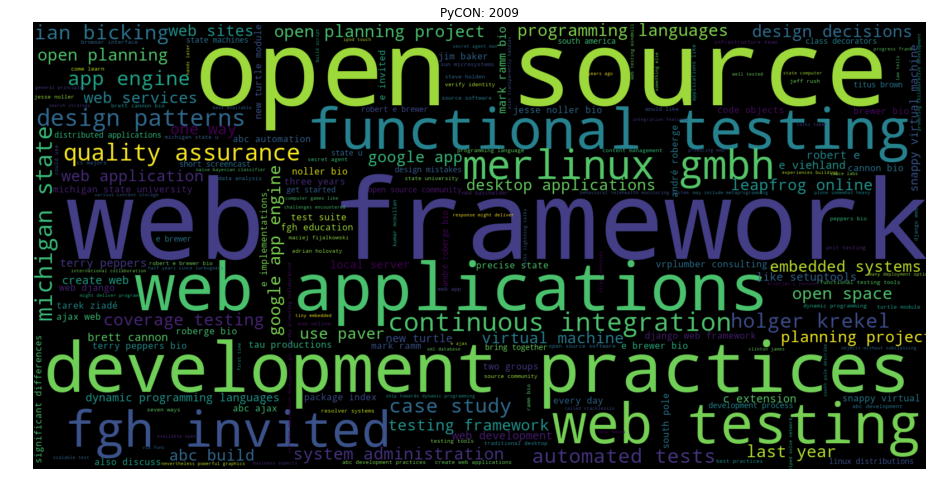

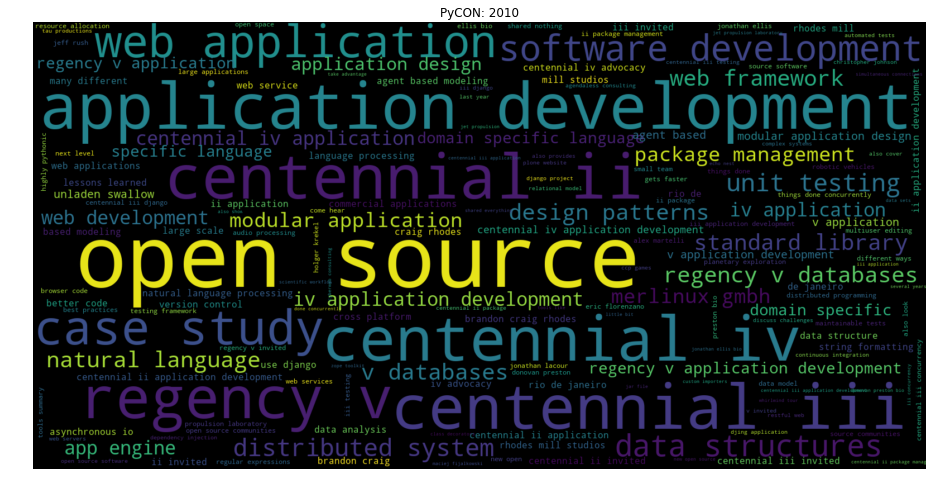

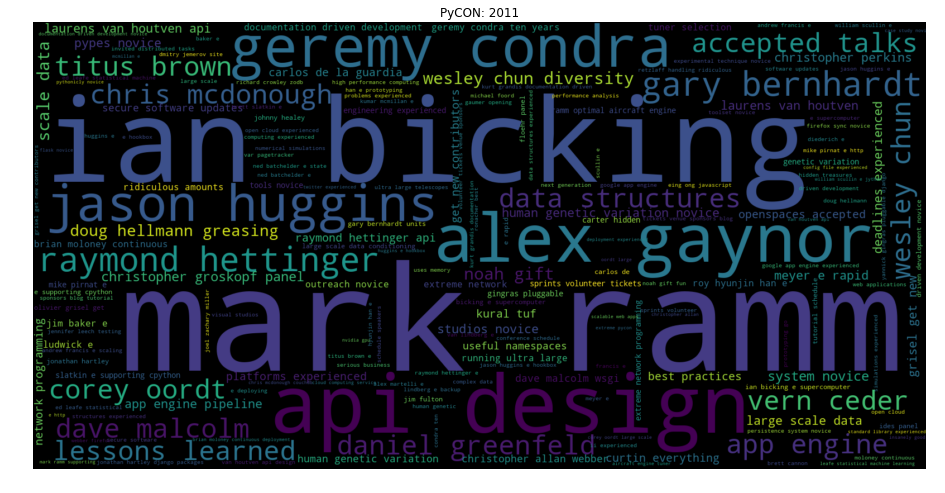

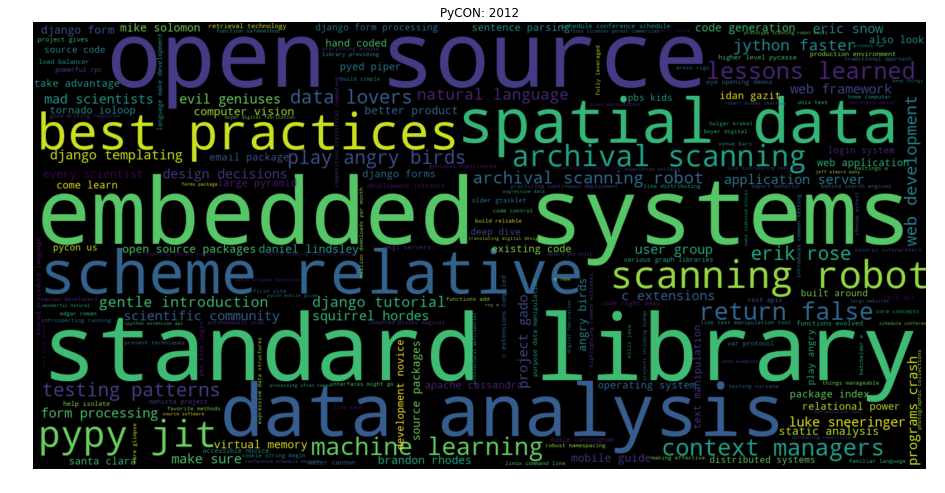

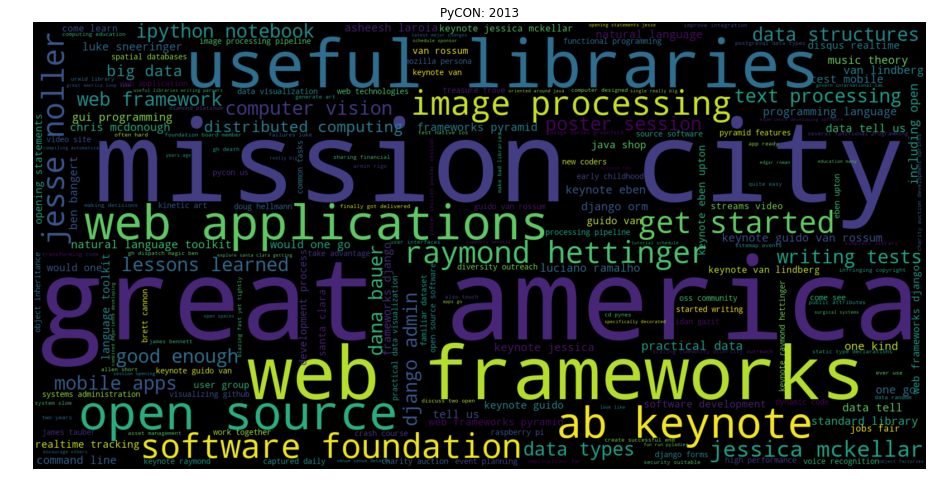

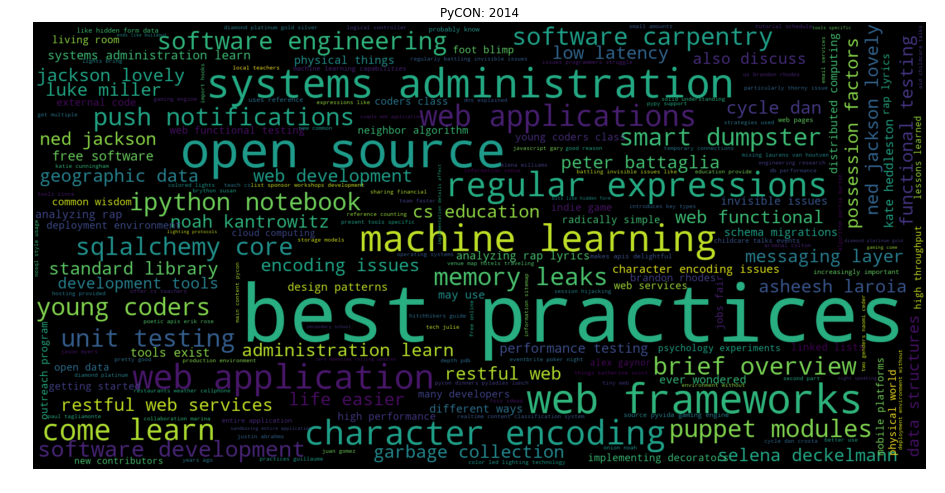

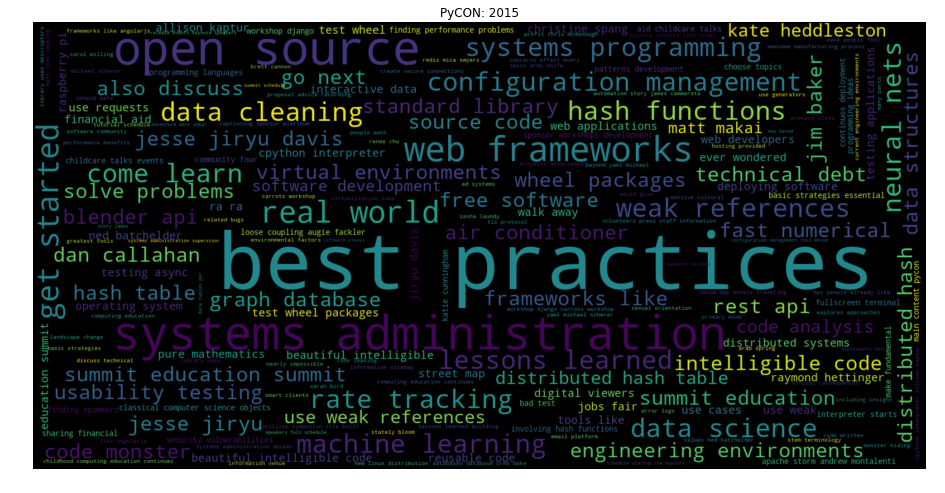

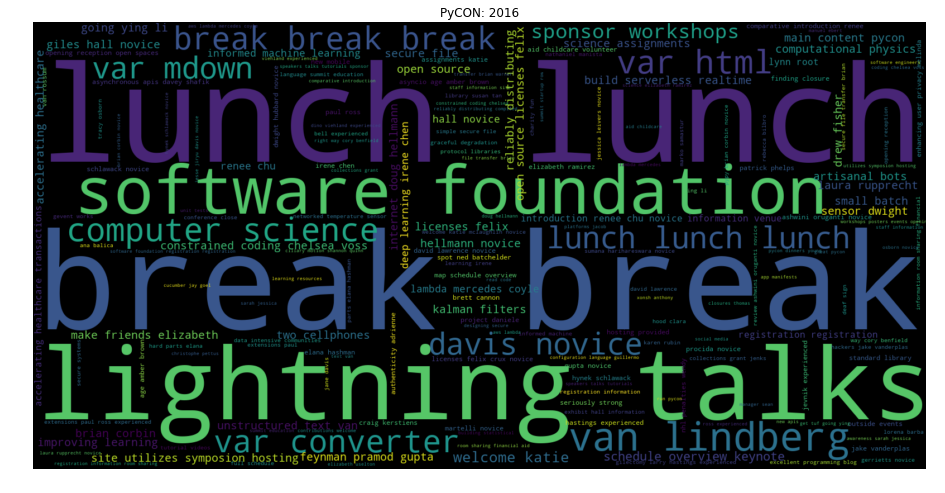

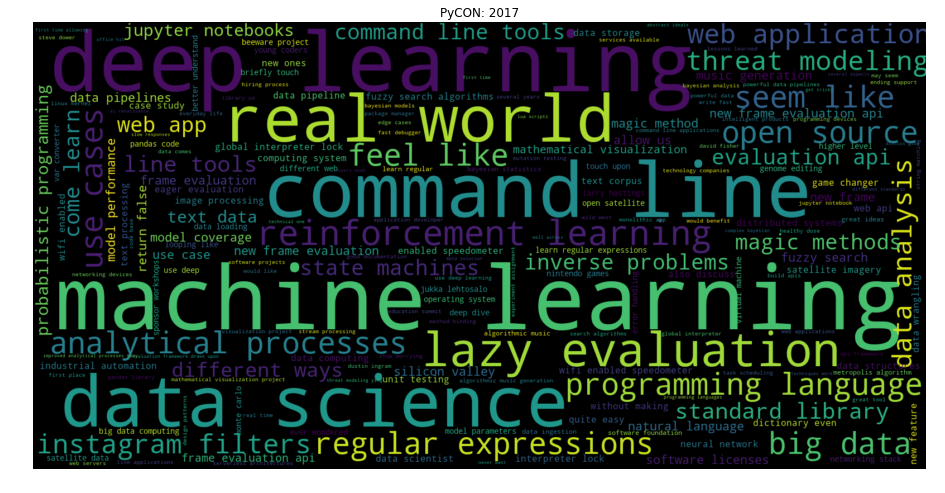

year                        phrase  count
0    2006           developers tutorial      3
1    2006                 update search      3
2    2006       open source application      3
3    2006          programming language      3
4    2006              sprint following      3
5    2006                   cdp capital      3
6    2006                      web page      3
7    2006                    easy slide      3
8    2006                lead developer      3
9    2006       application development      8
10   2006                  command line      3
11   2006                    case study      3
12   2006     docutils sprint following      3
13   2006  docutils developers tutorial      3
14   2006           agile documentation      3
15   2006              easy slide shows      3
16   2006               version control      3
17   2006                   open source     14
18   2006               level languages      3
19   2006         development framework      3
20   2006                    data entry      3
21   2006               web application      3
22   2006            source application      3
23   2006                  pypy project      4
24   2006                     code base      4
25   2006               docutils sprint      3
26   2006           docutils developers      3
27   2006              web applications      5
28   2006                   slide shows      4
29   2006             bytecode compiler      4
..    ...                           ...    ...
307  2017      new frame evaluation api      3
308  2017              frame evaluation      3
309  2017             model performance      3
310  2017                      big data      4
311  2017                  return false      3
312  2017          analytical processes      4
313  2017              natural language      3
314  2017                silicon valley      3
315  2017                     feel like      4
316  2017                     seem like      4
317  2017             instagram filters      4
318  2017               lazy evaluation      6
319  2017                      use case      3
320  2017                model coverage      3
321  2017        reinforcement learning      5
322  2017                     new frame      3
323  2017                  command line      8
324  2017                 deep learning      9
325  2017              music generation      3
326  2017             software licenses      3
327  2017          new frame evaluation      3
328  2017               web application      4
329  2017               threat modeling      4
330  2017                  magic method      3
331  2017                  fuzzy search      3
332  2017                      allow us      3
333  2017                data pipelines      3
334  2017          frame evaluation api      3
335  2017                 data analysis      4
336  2017    mathematical visualization      3

[337 rows x 3 columns]

In [65]:
import pandas

rows = list()

for year, pycon_year_text in zip(TALK_YEARS, talk_descriptions):
    token = word_tokenize(pycon_year_text.lower())
    unigrams = ngrams(token, 1)
    bigrams = ngrams(token, 2)
    trigrams = ngrams(token, 3)
    fourgrams = ngrams(token, 4)

    def word_criteria(word):
        if not word:
            return False
        if word.lower() in our_stopwords:
            return False
        return word.isalpha()

    def filter_stopwords(ngrams_list):
        return filter(lambda ngrams: all(map(word_criteria, ngrams)), ngrams_list)

    def join_ngram(ngrams_list):
        return map(lambda ngrams: ' '.join(ngrams), ngrams_list)

    phrase_counter = Counter()
    #phrase_counter.update(join_ngram(filter_stopwords(unigrams)))
    phrase_counter.update(join_ngram(filter_stopwords(bigrams)))
    phrase_counter.update(join_ngram(filter_stopwords(trigrams)))
    phrase_counter.update(join_ngram(filter_stopwords(fourgrams)))
    
    new_columns = ( {'phrase': phrase, 'count': count, 'year': year} 
                           for phrase, count in phrase_counter.items() )
    
    rows.extend(filter(lambda x: x['count'] > 2, new_columns))
    
    wordcloud = WordCloud(relative_scaling=.6, width=800, height=400, scale=2.0)

    wordcloud.generate_from_frequencies(phrase_counter)

    plt.title('PyCON: %s' % year)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

df = pandas.DataFrame(columns=['year', 'phrase', 'count'], data=rows)
df

In [81]:
df[df['year'] == 2011]

#df[df['phrase'] == 'machine learning']

year     phrase  count
201  2011  mark ramm      3

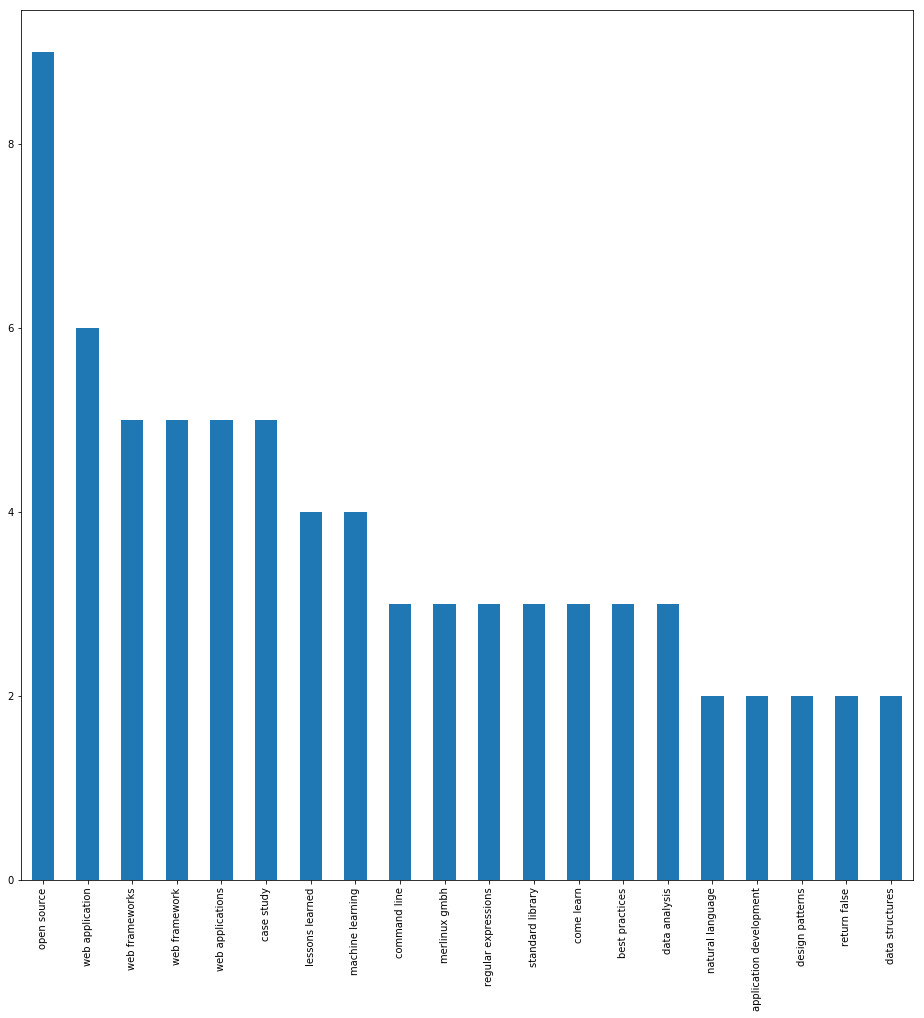

In [89]:
df['phrase'].value_counts()[:20].plot(kind='bar', x='count', y='phrase')
plt.show()

Phrases voted by year
============

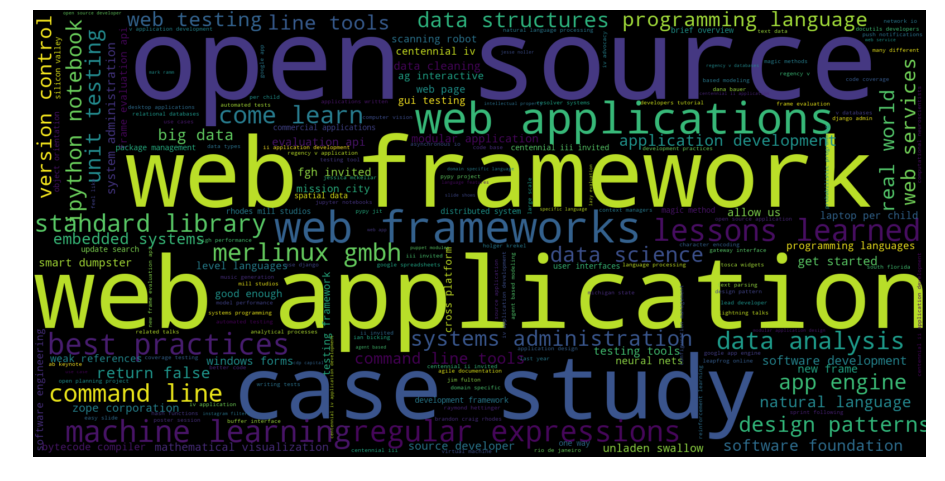

In [72]:
year_count = Counter(df['phrase'])

wordcloud = WordCloud(relative_scaling=.2, width=800, height=400, scale=2.0)

wordcloud.generate_from_frequencies(year_count)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Key Topics
======


Lifted from the phrases seen and organized into categories.


best practices
-----------------

write code that is predictable and comprehendable to others.

* open source community (conduct, pyladies, merlinux, software carpentry)
* case studies (post-mortem, code reviews)
* package management (pip, virtualenv, conda)
* design patterns (datastructures, DRY)
* testing (tox, ci, pytest)
* source control (git, mercurial)
* command line (unix, ssh, argparse)


Software carpentry is a teaching community specializing in these skillsets:

https://software-carpentry.org/



devops
-------

system administration, scripting, and deployments

* task automation (xonsh, fabric)
* procurement (boto, saltstack, puppet)
* containers (virtualenv, docker, vagrant)


web applications
-------------------

communicate over the web, write services that can scale.

* requests
* microservices (flask, hug)
* frameworks (pyramid, django, drf)
* scaling (gevent, twisted, asyncio)
* task queues (zeromq, celery, multiprocess)


data science
--------------

retrieve, explore, visualize & asses information

* analyze (jupyter notebooks, pandas)
* compute (numpy, scipy)
* visualization libraries
* parse html (beautiful soup)
* image processing (opencv, pil)
* gis
* natural language processing (nltk)


machine learning
-------------------

use statistical models to extract information from messy and noisy data

* using neural net models (tensorflow, keras, torch)
* classification (magpie, probabalistic string parser)
* ensemble & linear methods (scipy)


embedded systems
-------------------

use python on tiny devices and interface with hardware

* micropython
* raspberypi
* opencv, tensorflow
* automation
